In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import missingno as msno

### 1- import dataset

In [2]:

# Charger le dataset
df = pd.read_csv(r"Z:\Study\Data Mining\Tps-Aoudjit\MiniProjet1\dataset\kaggle_Interests_group.csv", encoding='utf-8')

# Aperçu du dataset

df.head()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Columns: 219 entries, group to interest217
dtypes: float64(217), int64(1), object(1)
memory usage: 10.6+ MB


In [4]:
occ = df['group'].value_counts()
occ

group
I    1809
P    1731
C    1725
R    1075
Name: count, dtype: int64

In [6]:
# Improved function to visualize missing values
def plot_missing_values(data):
   
    
    # Calculate missing value stats
    missing_stats = data.isnull().sum()
    total_missing = missing_stats.sum()
    missing_percentage = (total_missing / data.size) * 100
    
    print(f"Total Missing Values: {total_missing}")
    print(f"Percentage of Missing Values: {missing_percentage:.2f}%\n")
    print("Missing Values per Column:")
    print(missing_stats[missing_stats > 0])
    
    

# Call the function with your DataFrame
plot_missing_values(df)


Total Missing Values: 1139339
Percentage of Missing Values: 82.06%

Missing Values per Column:
interest1      5347
interest2      6339
interest3      6305
interest4      6315
interest5      5542
               ... 
interest213    6338
interest214    6268
interest215    1397
interest216    2282
interest217    6193
Length: 217, dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(col)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Remplacer les valeurs NaN par 0

data_cleaned = df.iloc[:,  0:].fillna(0)
data_cleaned.head()

group


,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,43,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


##### Standardisation


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_cleaned)
df_scaled



array([[-1.27325087, -1.29142213, -0.4309427 , ..., -1.88017358,
        -1.33305999, -0.15406647],
       [-1.27325087,  0.36161424,  2.3204941 , ...,  0.53089044,
         0.74912783, -0.15406647],
       [-1.27325087, -0.65563891, -0.4309427 , ...,  0.53089044,
         0.74912783, -0.15406647],
       ...,
       [-0.32310839,  0.67950585, -0.4309427 , ...,  0.53089044,
         0.74912783, -0.15406647],
       [-0.32310839,  0.04372263, -0.4309427 , ...,  0.53089044,
         0.74912783, -0.15406647],
       [-0.32310839,  1.82391565,  2.3204941 , ...,  0.53089044,
         0.74912783, -0.15406647]])

###  Réduction de la dimensionnalité

- La réduction de dimensionnalité permet de simplifier un dataset en diminuant le nombre de variables (ou dimensions) 
- tout en conservant l'essentiel de l'information. Cela facilite la visualisation, réduit le bruit, améliore les performances 
- des algorithmes (comme K-means) et atténue les effets de la malédiction de la dimensionnalité.


Variance expliquée par chaque composante :  [0.08924086 0.03750904 0.02084994 0.01611364 0.01462775 0.01051596
 0.00944297 0.00894972 0.00869549 0.0079917  0.0078721  0.00772278
 0.00765854 0.00747734 0.00733945 0.0071842  0.00702165 0.00688057
 0.00678352 0.00668955 0.00655682 0.00652112 0.00634263 0.00633048
 0.00625061 0.00611487 0.00605551 0.00601794 0.00597319 0.00591491
 0.00587929 0.00581936 0.00575154 0.00572213 0.00563662 0.0056136
 0.00556295 0.00551409 0.00550305 0.00545689 0.00541443 0.00537144
 0.00534543 0.00531459 0.00527534 0.00523889 0.00520165 0.00519633
 0.00516201 0.00515093 0.00510222 0.00508589 0.00504402 0.00499746
 0.00496986 0.00495955 0.00491073 0.00489315 0.00487998 0.00486126
 0.00483506 0.00481727 0.00480328 0.00478404 0.00477187 0.004729
 0.00471654 0.00469162 0.00468194 0.00464338 0.00463575 0.00462761
 0.00461931 0.00458682 0.00455742 0.00454637 0.0045359  0.00449788
 0.00447843 0.00444725 0.00442898 0.00440201 0.00439786 0.00436562
 0.00433191 0.0043260

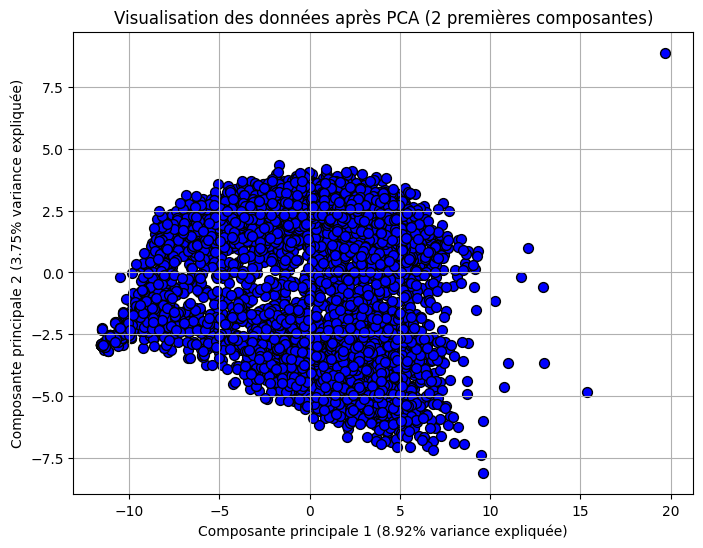

In [24]:
# Application de la PCA avec 95 % de variance expliquée
pca = PCA(n_components=0.95)  # Garder les composantes expliquant 95 % de la variance
data_reduced = pca.fit_transform(df_scaled)

# Affichage des variances expliquées
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante : ", explained_variance_ratio)
print("Variance expliquée cumulée : ", np.sum(explained_variance_ratio))
print("Nombre de composantes nécessaires pour expliquer 95 % de la variance : ", pca.n_components_)

# Visualisation des deux premières composantes
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c='blue', edgecolor='k', s=50)
plt.title("Visualisation des données après PCA (2 premières composantes)")
plt.xlabel(f"Composante principale 1 ({explained_variance_ratio[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"Composante principale 2 ({explained_variance_ratio[1]*100:.2f}% variance expliquée)")
plt.grid(True)
plt.show()


##### Choisir le nombre de clusters (méthode du coude)

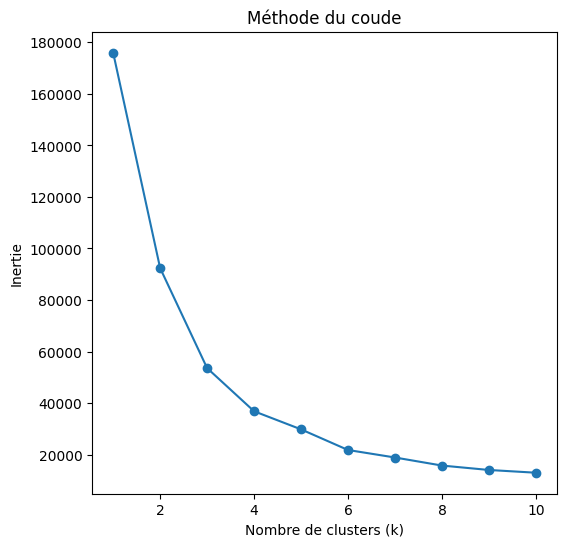

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_reduced)  # Utilise les données réduites ou normalisées
    inertia.append(kmeans.inertia_)

fig = plt.subplots(figsize=(6,6))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

##### Silhouette Score

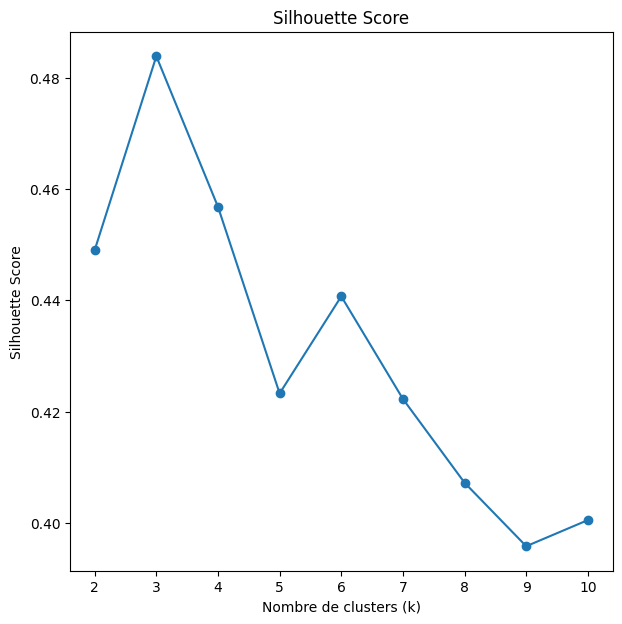

In [10]:
from sklearn.metrics import silhouette_score
max_k=10
silhouette_scores = []
for k in range(2, max_k+1):  # Silhouette Score nécessite au moins 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_reduced)
    score = silhouette_score(data_reduced, kmeans.labels_)
    silhouette_scores.append(score)

# Tracé du Silhouette Score
plt.figure(figsize=(7, 7))
plt.plot(range(2, max_k+1), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [11]:
K = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Le nombre optimal de clusters est : {K}")

Le nombre optimal de clusters est : 3


##### Appliquer K-Means

In [17]:
# Appliquer K-means
k = 3  # Exemple basé sur la méthode du coude 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_reduced)

# Ajouter les labels de cluster au dataset
data_cleaned["Cluster"] = kmeans.labels_
data_cleaned.head()


,Cluster,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,1,0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,43,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2,0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2,0,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [18]:
# Repositionner la colonne 'Cluster' en premier
columns = ['Cluster'] + [col for col in data_cleaned.columns if col != 'Cluster']
data_cleaned = data_cleaned[columns]

# Vérifier le DataFrame mis à jour
data_cleaned.head()


,Cluster,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,1,0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,43,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2,0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2,0,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


##### Distribution des Clusters

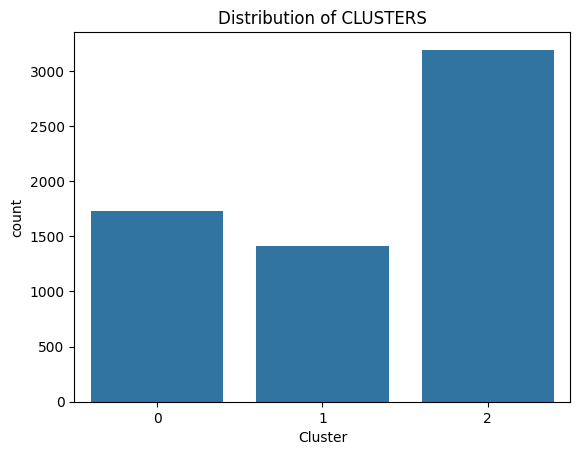

In [20]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cluster', data=data_cleaned)
plt.title('Distribution of CLUSTERS')
plt.show()

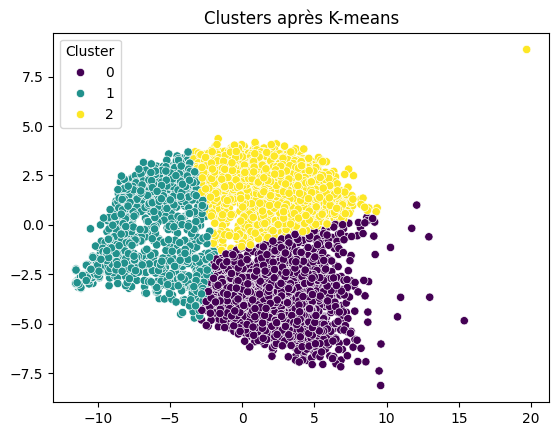

In [21]:
import seaborn as sns

sns.scatterplot(x=data_reduced[:, 0], y=data_reduced[:, 1], hue=data_cleaned["Cluster"], palette="viridis")
plt.title("Clusters après K-means")
plt.show()
